<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/house_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Linear Regression - Predict house rental price

## Import

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

## Dataset

In [31]:
# DATASET - 536 records of rental price/surface of houses

house_data = pd.read_csv("house.csv")

# clean for NaN values if any
house_data.isna().sum()

# ignore too high values
house_data = house_data[house_data["loyer"] < 7500]
house_data = house_data[house_data["surface"] < 200]

house_data.head() # first rows

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


In [32]:
# Splitting for test set

train_dataset = house_data.sample(frac=0.8, random_state=0)
test_dataset = house_data.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('loyer')
test_labels = test_features.pop('loyer')

,count,mean,std,min,25%,50%,75%,max
loyer,426.0,2046.002347,1125.806297,488.0,1246.25,1772.5,2542.5,7450.0
surface,426.0,58.164319,34.570388,11.0,32.00,50.0,75.0,182.0


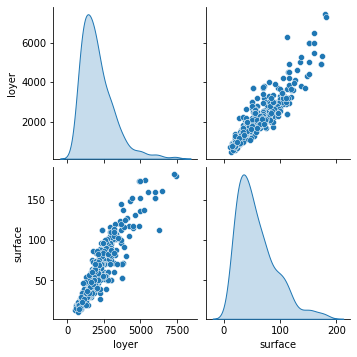

In [33]:
# Visualizing dataset

sns.pairplot(train_dataset[['loyer', 'surface']], diag_kind='kde')
train_dataset.describe().transpose()

## Model

In [34]:
# Normalizer layer

surface = np.array(train_features)

surface_normalizer = layers.Normalization(input_shape=[1,], axis=None)
surface_normalizer.adapt(surface)


In [35]:
# Model definition - this model should predict rent price of an house

model = tf.keras.Sequential([
    surface_normalizer,
    layers.Dense(units=1)
])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


## Training

In [36]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=5),
    loss='mean_absolute_error')

history = model.fit(
    train_features,
    train_labels,
    epochs=60,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


Epoch 1/60
11/11 [==============================] - 1s 21ms/step - loss: 2045.1533 - val_loss: 1900.7284
Epoch 2/60
11/11 [==============================] - 0s 6ms/step - loss: 1989.8964 - val_loss: 1845.5781
Epoch 3/60
11/11 [==============================] - 0s 5ms/step - loss: 1934.6787 - val_loss: 1791.1801
Epoch 4/60
11/11 [==============================] - 0s 5ms/step - loss: 1879.5839 - val_loss: 1736.6250
Epoch 5/60
11/11 [==============================] - 0s 4ms/step - loss: 1824.4049 - val_loss: 1682.3579
Epoch 6/60
11/11 [==============================] - 0s 5ms/step - loss: 1769.4659 - val_loss: 1628.2501
Epoch 7/60
11/11 [==============================] - 0s 7ms/step - loss: 1714.1472 - val_loss: 1573.2587
Epoch 8/60
11/11 [==============================] - 0s 4ms/step - loss: 1659.0876 - val_loss: 1518.9528
Epoch 9/60
11/11 [==============================] - 0s 4ms/step - loss: 1604.0842 - val_loss: 1464.5607
Epoch 10/60
11/11 [==============================] - 0s 6ms/ste

## Results

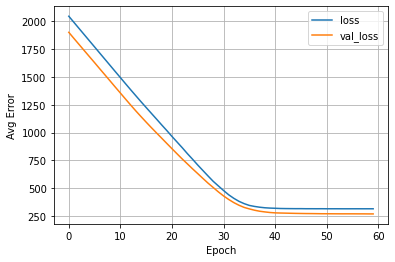

In [37]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Avg Error')
plt.legend()
plt.grid(True)

plt.show()

In [38]:
score = model.evaluate(test_features, test_labels)
print("Average rent (loyer) error : {}".format(score))

4/4 [==============================] - 0s 3ms/step - loss: 260.3120
Average rent (loyer) error : 260.3120422363281
